In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [35]:
# Beginning the SVM chapter here
# First up, is a demonstration of how some linear classifiers separate the data with very less margin
# In contrast, SVMs classify data keeping a clean margin between the separated classes
# SVC refers to Support Vector Classifier

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris() # loading IRIS dataset used previously

X = iris["data"][:, (2, 3)] # Create training set out of only petal length and petal width for 150 training samples
y = iris["target"] # Create test set out of target values

setosa_or_versicolor = (y == 0) | (y == 1) # Create an array of 'True' & 'False' values for 100 setosa or versicolour flowers
X = X[setosa_or_versicolor] # Filter the training set X to keep only setosa and versicolour features in X
y = y[setosa_or_versicolor] # The same to target values in y

# Creation of training and target values are complete here.
# Now apply SVM classifier of this data.
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Trying out a few commands to check their functions
print(svm_clf.coef_[0])
print(svm_clf.intercept_)
print(svm_clf.support_vectors_)

x0 = np.linspace(0, 5.5, 200)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
X[:, 0][y==1]

[ 1.29411744  0.82352928]
[-3.78823471]
[[ 1.9  0.4]
 [ 3.   1.1]]


array([ 4.7,  4.5,  4.9,  4. ,  4.6,  4.5,  4.7,  3.3,  4.6,  3.9,  3.5,
        4.2,  4. ,  4.7,  3.6,  4.4,  4.5,  4.1,  4.5,  3.9,  4.8,  4. ,
        4.9,  4.7,  4.3,  4.4,  4.8,  5. ,  4.5,  3.5,  3.8,  3.7,  3.9,
        5.1,  4.5,  4.5,  4.7,  4.4,  4.1,  4. ,  4.4,  4.6,  4. ,  3.3,
        4.2,  4.2,  4.2,  4.3,  3. ,  4.1])

Saving figure large_margin_classification_plot


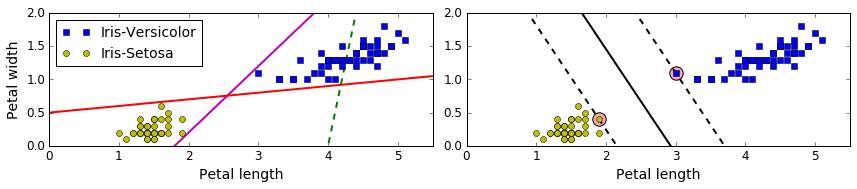

In [36]:
# Examples of bad linear SVM classifiers
x0 = np.linspace(0, 5.5, 200)  # Generate 200 numbers between 0 and 5.5

# Three straight lines
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# Function to plot the SVM decision boundaries
# xmin and xmax are easily found here because the training values are generated by the developer
# Normally we have to find the minimum and maximum values of the training data
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # svm_clf.coef_ attribute is an array which contains two coefficients for the features in training set. 
    
    # Using [0] for w makes it store the array of coefficients
    w = svm_clf.coef_[0]
    # Using [0] for b makes it store only the value and not the entire array
    b = svm_clf.intercept_[0] 
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1 - computes values of x1 for values of x0
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] # This is an example of a vectorized implementation
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # support_vectors_ attribute stores the support vectors for this classifier
    # Support vectors are the borderline cases which are on the gutter-up or gutter-down lines
    svs = svm_clf.support_vectors_ 
    
    # These plots draw the skeleton of the SVM curve
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plt.figure(figsize=(12,2.7)) # dimensions of the complete figure

# Hardcoded subplot using the predefined straight line equations at the start of the cell
plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
#plot all values in the first column of array X (X[:, 0]), which satisfies y==1
#plot all values in the second column of array X (X[:, 1]), which satisfies y==1
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Calls the SVC decision boundary function to plot curve for SVM
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()